## Docstrings
#### Crafting a docstring
You've decided to write the world's greatest open-source natural language processing Python package. It will revolutionize working with free-form text, the way numpy did for arrays, pandas did for tabular data, and scikit-learn did for machine learning.

The first function you write is count_letter(). It takes a string and a single letter and returns the number of times the letter appears in the string. You want the users of your open-source package to be able to understand how this function works easily, so you will need to give it a docstring. Build up a Google Style docstring for this function by following these steps.

In [1]:
# Add a docstring to count_letter()
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`."""
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [2]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  # Add a Google style arguments section
  Args:
    content (str): The string to search.
    letter (str): The letter to search for.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [ ]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  # Add a returns section
  Returns:
    int
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('"letter" must be a single character string.')
  return len([char for char in content if char == letter])

In [ ]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

What a delightful docstring! While it does require a bit more typing, the information presented here will make it very easy for others to use this code in the future. Remember that even though computers execute it, code is actually written for humans to read (otherwise you'd just be writing the 1s and 0s that the computer operates on).

#### Retrieving docstrings
You and a group of friends are working on building an amazing new Python IDE (integrated development environment -- like PyCharm, Spyder, Eclipse, Visual Studio, etc.). The team wants to add a feature that displays a tooltip with a function's docstring whenever the user starts typing the function name. That way, the user doesn't have to go elsewhere to look up the documentation for the function they are trying to use. You've been asked to complete the build_tooltip() function that retrieves a docstring from an arbitrary function.

You will be reusing the count_letter() function that you developed in the last exercise to show that we can properly extract its docstring.

In [3]:
# Get the "count_letter" docstring by using an attribute of the function
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

############################
Count the number of times `letter` appears in `content`.

  # Add a Google style arguments section
  Args:
    content (str): The string to search.
    letter (str): The letter to search for.
  
############################


In [4]:
import inspect

# Inspect the count_letter() function to get its docstring
docstring = inspect.getdoc(count_letter)

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

############################
Count the number of times `letter` appears in `content`.

# Add a Google style arguments section
Args:
  content (str): The string to search.
  letter (str): The letter to search for.
############################


In [5]:
import inspect

def build_tooltip(function):
  """Create a tooltip for any function that shows the
  function's docstring.

  Args:
    function (callable): The function we want a tooltip for.

  Returns:
    str
  """
  # Get the docstring for the "function" argument by using inspect
  docstring = inspect.getdoc("function")
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

############################
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
############################
############################
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
############################
############################
str(object=

This IDE is going to be an incredibly delightful experience for your users now! Notice how the count_letter.__doc__ version of the docstring had strange whitespace at the beginning of all but the first line. That's because the docstring is indented to line up visually when reading the code. But when we want to print the docstring, removing those leading spaces with inspect.getdoc() will look much better.

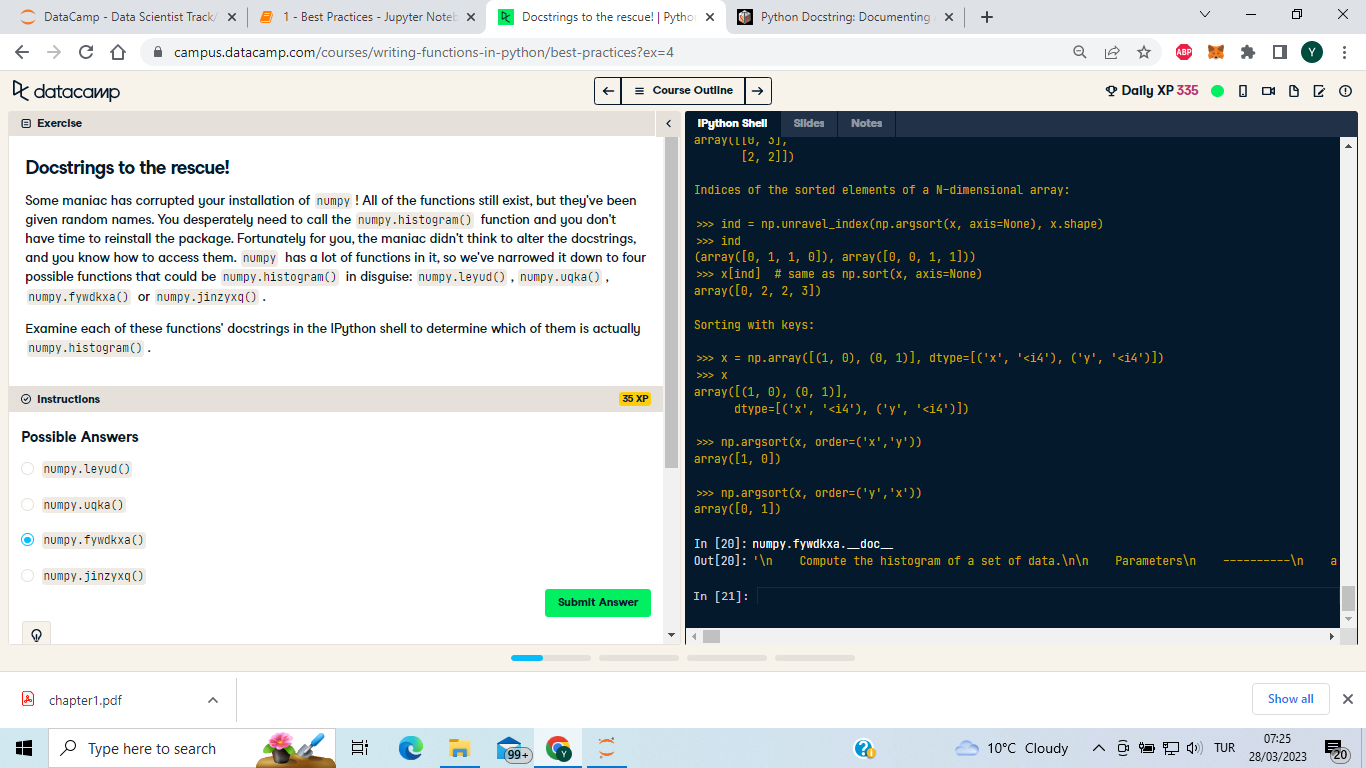

You found it! numpy.fywdkxa() is actually numpy.histogram() in disguise. If you've spent any time browsing numpy's online documentation, you will notice that it is built directly from the docstrings. There are some wonderful tools like sphinx and pydoc that will automatically generate online documentation for you based off of your docstrings.

## DRY and "Do One Thing"
#### Extract a function
While you were developing a model to predict the likelihood of a student graduating from college, you wrote this bit of code to get the z-scores of students' yearly GPAs. Now you're ready to turn it into a production-quality system, so you need to do something about the repetition. Writing a function to calculate the z-scores would improve this code.

#Standardize the GPAs for each year<br>
df['y1_z'] = (df.y1_gpa - df.y1_gpa.mean()) / df.y1_gpa.std()<br>
df['y2_z'] = (df.y2_gpa - df.y2_gpa.mean()) / df.y2_gpa.std()<br>
df['y3_z'] = (df.y3_gpa - df.y3_gpa.mean()) / df.y3_gpa.std()<br>
df['y4_z'] = (df.y4_gpa - df.y4_gpa.mean()) / df.y4_gpa.std()

In [10]:
import pandas as pd
df = pd.read_csv("df.TXT")
df

,,y1_gpa,y2_gpa,y3_gpa,y4_gpa
0,0,2.786,2.053,2.171,0.066
1,1,1.145,2.666,0.267,2.885
2,2,0.907,0.424,2.613,0.031
3,3,2.205,0.524,3.984,0.339
4,4,2.878,1.288,3.078,0.902
5,5,2.767,2.544,3.760,1.442
6,6,0.605,0.129,3.331,0.843
7,7,1.596,2.979,3.384,1.685
8,8,0.963,1.892,0.496,0.872
9,9,1.374,0.487,2.386,3.383


In [12]:
def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (column - column.mean()) / column.std()
  return z_score

# Use the standardize() function to calculate the z-scores
df['y1_z'] = standardize(df['y1_gpa'])
df['y2_z'] = standardize(df['y2_gpa'])
df['y3_z'] = standardize(df['y3_gpa'])
df['y4_z'] = standardize(df['y4_gpa'])

print(df['y1_z'])

KeyError: 'y2_gpa'

That's a fantastic function! standardize() will probably be useful in other places in your code, and now it is easy to use, test, and update if you need to. It's also easier to tell what the code is doing because of the docstring and the name of the function.

#### Split up a function
Another engineer on your team has written this function to calculate the mean and median of a sorted list. You want to show them how to split it into two simpler functions: mean() and median()<br>

def mean_and_median(values):<br>
  """Get the mean and median of a sorted list of `values`<br>

  Args:<br>
    values (iterable of float): A list of numbers<br>
<br>
  Returns:<br>
    tuple (float, float): The mean and median<br>
  """<br>
  mean = sum(values) / len(values)<br>
  midpoint = int(len(values) / 2)<br>
  if len(values) % 2 == 0:<br>
    median = (values[midpoint - 1] + values[midpoint]) / 2<br>
  else:<br>
    median = values[midpoint]<br>
<br>
  return mean, median<br>

In [1]:
def mean(values):
  """Get the mean of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() function
  mean = sum(values)/len(values)
  return mean

In [1]:
def median(values):
  """Get the median of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values)/2)
  if len(values)%2 == 0:
    median  = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median  = values[midpoint]
  return median

A perfect split! Each function does one thing and does it well. Using, testing, and maintaining these will be a breeze (although you'll probably just use numpy.mean() and numpy.median() for this in real life).

## Pass by assignment
#### Mutable or immutable?

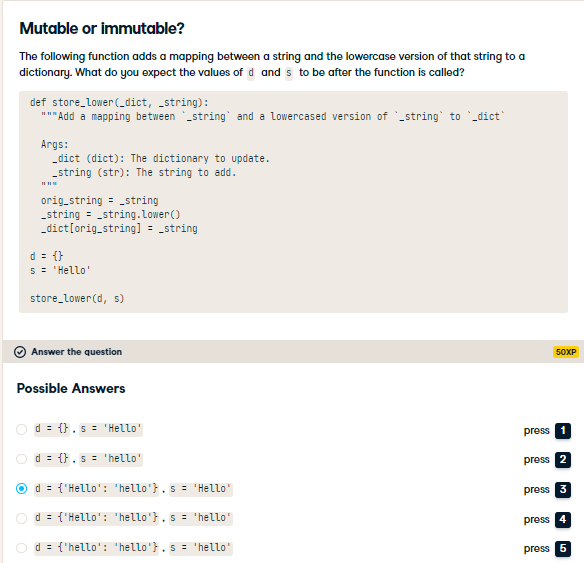

Correct! Dictionaries are mutable objects in Python, so the function can directly change it in the _dict[_orig_string] = _string statement. Strings, on the other hand, are immutable. When the function creates the lowercase version, it has to assign it to the _string variable. This disconnects what happens to _string from the external s variable.

#### Best practice for default arguments
One of your co-workers (who obviously didn't take this course) has written this function for adding a column to a pandas DataFrame. Unfortunately, they used a mutable variable as a default argument value! Please show them a better way to do this so that they don't get unexpected behavior.<br>
<br>
def add_column(values, df=pandas.DataFrame()):<br>
  """Add a column of `values` to a DataFrame `df`.<br>
  The column will be named "col_<n>" where "n" is<br>
  the numerical index of the column.<br>
<br>
  Args:<br>
    values (iterable): The values of the new column<br>
    df (DataFrame, optional): The DataFrame to update.<br>
      If no DataFrame is passed, one is created by default.<br>
<br>
  Returns:<br>
    DataFrame<br>
  """<br>
  df['col_{}'.format(len(df.columns))] = values<br>
  return df<br>

In [3]:
# Use an immutable variable for the default argument
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

Beautiful and best practice! When you need to set a mutable variable as a default argument, always use None and then set the value in the body of the function. This prevents unexpected behavior like adding multiple columns if you call the function more than once.